In [1]:
#PyTorch libraries
import torch
import torch.nn as nn
import torch.optim as optim

#Other libraries
import numpy as np
from matplotlib import pyplot as plt

#Custom python files
from model import LSTM_baseline
from dataloader import *

In [11]:
num_epochs = 500
total_num_games = 1000
p_val=0.1
p_test=0.2
learning_rate = 0.01
batch_size = 20

input_dim = 32
hidden_dim = 70
output_dim = 1

train_loader, val_loader, test_loader = split_dataloader(batch_size=batch_size, total_num_games=total_num_games, 
                                                         p_val=p_val, p_test=p_test)

model = LSTM_baseline(input_dim, hidden_dim, output_dim,batch_size=batch_size)

In [12]:
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [13]:
ave_train_loss = []
ave_val_loss = []

for epoch in range(num_epochs):
    
    total_loss = 0
    total_val_loss = 0
    
    train_count = 0
    for (sequences, labels) in train_loader:
        sequences, labels = sequences.to(model.device), labels.to(model.device)
        train_count += 1
        optimizer.zero_grad()
        
        outputs = model(sequences)
        loss = loss_function(outputs.squeeze(), labels)
        
        loss.backward()
        optimizer.step()
        
        total_loss += loss
        
        
    val_count = 0
    with torch.no_grad():
        for (sequences, labels) in val_loader:
            sequences, labels = sequences.to(model.device), labels.to(model.device)
            val_count += 1
            
            outputs = model(sequences)
            loss = loss_function(outputs.squeeze(), labels)
            
            total_val_loss += loss
    
    ave_train_loss.append(total_loss/train_count)
    ave_val_loss.append(total_val_loss/val_count)
    
    print("Epoch %d finished. Train loss: %f. Validation loss: %f" % 
         (epoch+1, ave_train_loss[-1], ave_val_loss[-1]))

Epoch 1 finished. Train loss: 0.066033. Validation loss: 0.035793
Epoch 2 finished. Train loss: 0.036031. Validation loss: 0.027873
Epoch 3 finished. Train loss: 0.030636. Validation loss: 0.026328
Epoch 4 finished. Train loss: 0.029042. Validation loss: 0.027785
Epoch 5 finished. Train loss: 0.030420. Validation loss: 0.024508
Epoch 6 finished. Train loss: 0.029479. Validation loss: 0.028073
Epoch 7 finished. Train loss: 0.032689. Validation loss: 0.026441
Epoch 8 finished. Train loss: 0.029336. Validation loss: 0.025419
Epoch 9 finished. Train loss: 0.029287. Validation loss: 0.025523
Epoch 10 finished. Train loss: 0.029094. Validation loss: 0.024373
Epoch 11 finished. Train loss: 0.028604. Validation loss: 0.024530
Epoch 12 finished. Train loss: 0.027696. Validation loss: 0.025454
Epoch 13 finished. Train loss: 0.026956. Validation loss: 0.023771
Epoch 14 finished. Train loss: 0.027765. Validation loss: 0.025002
Epoch 15 finished. Train loss: 0.026698. Validation loss: 0.022225
Epoc

Epoch 124 finished. Train loss: 0.025333. Validation loss: 0.024780
Epoch 125 finished. Train loss: 0.025264. Validation loss: 0.025168
Epoch 126 finished. Train loss: 0.025160. Validation loss: 0.023556
Epoch 127 finished. Train loss: 0.024814. Validation loss: 0.023870
Epoch 128 finished. Train loss: 0.025297. Validation loss: 0.023868
Epoch 129 finished. Train loss: 0.024667. Validation loss: 0.026013
Epoch 130 finished. Train loss: 0.025248. Validation loss: 0.026391
Epoch 131 finished. Train loss: 0.025806. Validation loss: 0.025974
Epoch 132 finished. Train loss: 0.025213. Validation loss: 0.025577
Epoch 133 finished. Train loss: 0.025355. Validation loss: 0.024621
Epoch 134 finished. Train loss: 0.024740. Validation loss: 0.024004
Epoch 135 finished. Train loss: 0.025262. Validation loss: 0.024531
Epoch 136 finished. Train loss: 0.025948. Validation loss: 0.025427
Epoch 137 finished. Train loss: 0.025666. Validation loss: 0.027751
Epoch 138 finished. Train loss: 0.025142. Valida

Epoch 245 finished. Train loss: 0.025042. Validation loss: 0.026198
Epoch 246 finished. Train loss: 0.026178. Validation loss: 0.023889
Epoch 247 finished. Train loss: 0.025002. Validation loss: 0.026663
Epoch 248 finished. Train loss: 0.025376. Validation loss: 0.025131
Epoch 249 finished. Train loss: 0.025053. Validation loss: 0.023768
Epoch 250 finished. Train loss: 0.025401. Validation loss: 0.025359
Epoch 251 finished. Train loss: 0.024912. Validation loss: 0.028837
Epoch 252 finished. Train loss: 0.026365. Validation loss: 0.027635
Epoch 253 finished. Train loss: 0.025199. Validation loss: 0.026486
Epoch 254 finished. Train loss: 0.025534. Validation loss: 0.025190
Epoch 255 finished. Train loss: 0.027252. Validation loss: 0.024686
Epoch 256 finished. Train loss: 0.024645. Validation loss: 0.026201
Epoch 257 finished. Train loss: 0.025604. Validation loss: 0.024828
Epoch 258 finished. Train loss: 0.025597. Validation loss: 0.025628
Epoch 259 finished. Train loss: 0.027035. Valida

Epoch 366 finished. Train loss: 0.024862. Validation loss: 0.026106
Epoch 367 finished. Train loss: 0.024752. Validation loss: 0.023548
Epoch 368 finished. Train loss: 0.025357. Validation loss: 0.024660
Epoch 369 finished. Train loss: 0.025489. Validation loss: 0.023977
Epoch 370 finished. Train loss: 0.025343. Validation loss: 0.024990
Epoch 371 finished. Train loss: 0.025288. Validation loss: 0.028534
Epoch 372 finished. Train loss: 0.024739. Validation loss: 0.023973
Epoch 373 finished. Train loss: 0.025802. Validation loss: 0.025064
Epoch 374 finished. Train loss: 0.024728. Validation loss: 0.026205
Epoch 375 finished. Train loss: 0.025255. Validation loss: 0.026386
Epoch 376 finished. Train loss: 0.025111. Validation loss: 0.026014
Epoch 377 finished. Train loss: 0.025137. Validation loss: 0.024604
Epoch 378 finished. Train loss: 0.025022. Validation loss: 0.025348
Epoch 379 finished. Train loss: 0.025187. Validation loss: 0.026566
Epoch 380 finished. Train loss: 0.025347. Valida

Epoch 487 finished. Train loss: 0.022475. Validation loss: 0.024976
Epoch 488 finished. Train loss: 0.023041. Validation loss: 0.023728
Epoch 489 finished. Train loss: 0.023072. Validation loss: 0.026353
Epoch 490 finished. Train loss: 0.022656. Validation loss: 0.022904
Epoch 491 finished. Train loss: 0.022274. Validation loss: 0.023194
Epoch 492 finished. Train loss: 0.022655. Validation loss: 0.025045
Epoch 493 finished. Train loss: 0.023009. Validation loss: 0.023145
Epoch 494 finished. Train loss: 0.024000. Validation loss: 0.024758
Epoch 495 finished. Train loss: 0.023952. Validation loss: 0.024683
Epoch 496 finished. Train loss: 0.023256. Validation loss: 0.031529
Epoch 497 finished. Train loss: 0.023680. Validation loss: 0.025017
Epoch 498 finished. Train loss: 0.022925. Validation loss: 0.022649
Epoch 499 finished. Train loss: 0.023487. Validation loss: 0.024751
Epoch 500 finished. Train loss: 0.024748. Validation loss: 0.024332


In [15]:
torch.save(model, './model_exp_decay.pt')

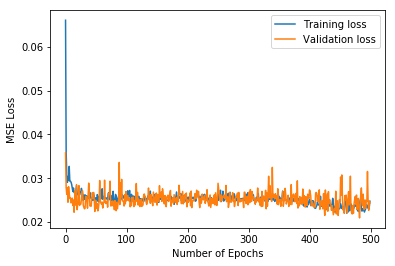

In [14]:
plt.figure(0)
plt.plot(ave_train_loss, label='Training loss')
plt.plot(ave_val_loss, label='Validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()